In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/data-storm-5-0/train_kaggle.csv
/kaggle/input/data-storm-5-0/test_kaggle.csv


In [3]:
df = pd.read_csv("/kaggle/input/data-storm-5-0/train_kaggle.csv")
df.head()

/tmp/ipykernel_33/3559461997.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/kaggle/input/data-storm-5-0/train_kaggle.csv")


Customer_ID outlet_city luxury_sales fresh_sales dry_sales cluster_catgeory
0   10493832.0    Kelaniya       1209.6       756.0    5292.0                4
1   10178643.0    Moratuwa      1590.12     1060.08   6007.12                1
2   10513916.0     Wattala      2288.88     1481.04   9155.52                4
3   10334589.0     Wattala      2274.94     1739.66   9099.76                4
4   10458365.0    Kelaniya      2345.49     2069.55   9243.99                4

In [4]:
numeric_column = pd.to_numeric(df['luxury_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'luxury_sales']

4234                                      NaN
4333                                      NaN
5375                                      NaN
5408                                      NaN
78367                                     NaN
78380                                     NaN
80043       One thousand four hundread ruppes
174628                                    NaN
175278                                    nul
296621                                    nul
297911                 Eight hundread ruppess
326593                six hundread and hirty 
327258                                    NaN
327259                                    NaN
327260                                    NaN
327261                                    NaN
329847                                    NaN
329848                                    NaN
329849                                    NaN
352298                                    NaN
352662                                    NaN
352663                            

In [5]:
df.loc[80043, 'luxury_sales'] = 1400
df.loc[297911, 'luxury_sales'] = 800
df.loc[326593, 'luxury_sales'] = 630
df.loc[497177, 'luxury_sales'] = 1200
df.loc[497245, 'luxury_sales'] = 709
df.loc[558562, 'luxury_sales'] = 3200
df.loc[753131, 'luxury_sales'] = 4100

In [6]:
numeric_column = pd.to_numeric(df['fresh_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'fresh_sales']

4326                                      NaN
4327                                      NaN
4333                                      NaN
4929                                      NaN
5379                                      NaN
5403                                      NaN
5408                                      NaN
78367                                     NaN
78380                                     NaN
78400                                     NaN
161810           Six hundread and five ruppes
174714                                    nul
268571                                    nul
326334       Three thousana and five hundread
326763                                    NaN
326764                                    NaN
326765                                    NaN
327495                                    nul
327505                                    nul
329931                                    NaN
352298                                    NaN
352658                            

In [7]:
df.loc[161810, 'fresh_sales'] = 605
df.loc[326334, 'fresh_sales'] = 3500
df.loc[558897, 'fresh_sales'] = 13000
df.loc[752816, 'fresh_sales'] = 5000
df.loc[753256, 'fresh_sales'] = 2700

In [8]:
numeric_column = pd.to_numeric(df['dry_sales'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'dry_sales']

4929                                        NaN
78400                                       NaN
148029    Four thousand and two hundread ruppes
174631                                      nul
174720                                      nul
175278                                      nul
268571                                      nul
296621                                      nul
327168                                      NaN
327169                                      NaN
327170                                      NaN
327171                                      NaN
327172                                      NaN
327173                                      NaN
327174                                      NaN
327495                                      nul
327505                                      nul
329931                                      NaN
345090                                      NaN
345091                                      NaN
345092                                  

In [9]:
df.loc[148029, 'dry_sales'] = 4200

In [10]:
numeric_column = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

# Find the indices where NaN values occur (indicating non-numeric values)
non_numeric_indices = numeric_column[numeric_column.isna()].index

df.loc[non_numeric_indices, 'cluster_catgeory']

3560       6\
555560    NaN
Name: cluster_catgeory, dtype: object

In [11]:
df.loc[3560, 'cluster_catgeory'] = 6

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 774155 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774153 non-null  float64
 1   outlet_city       774153 non-null  object 
 2   luxury_sales      774120 non-null  object 
 3   fresh_sales       774114 non-null  object 
 4   dry_sales         774125 non-null  object 
 5   cluster_catgeory  774154 non-null  object 
dtypes: float64(1), object(5)
memory usage: 35.4+ MB


In [13]:
df['luxury_sales'] = pd.to_numeric(df['luxury_sales'], errors='coerce')
df['fresh_sales'] = pd.to_numeric(df['fresh_sales'], errors='coerce')
df['dry_sales'] = pd.to_numeric(df['dry_sales'], errors='coerce')
df['cluster_catgeory'] = pd.to_numeric(df['cluster_catgeory'], errors='coerce')

In [14]:
print(df.head())
print(df.tail())

   Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0    Kelaniya       1209.60       756.00    5292.00   
1   10178643.0    Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0     Wattala       2288.88      1481.04    9155.52   
3   10334589.0     Wattala       2274.94      1739.66    9099.76   
4   10458365.0    Kelaniya       2345.49      2069.55    9243.99   

   cluster_catgeory  
0               4.0  
1               1.0  
2               4.0  
3               4.0  
4               4.0  
        Customer_ID outlet_city  luxury_sales  fresh_sales  dry_sales  \
774150   10197979.0     Gampaha       3893.40      3893.40    3448.44   
774151   10494575.0  Katunayake       6095.86      5557.99    6275.15   
774152   10565682.0     Colombo       5121.42      4820.16    4669.53   
774153   10351977.0       Kandy       6311.76      6311.76    5940.48   
774154   10637635.0     Negombo       5833.50      6027.95    6611.30   

        cluster_catg

In [15]:
df.describe()

Customer_ID   luxury_sales    fresh_sales      dry_sales  \
count  7.741530e+05  774117.000000  774110.000000  774118.000000   
mean   1.038708e+07    1921.963428    4428.683485    4676.279783   
std    2.234795e+05    1004.081416    3334.661775    3409.384574   
min    1.000000e+07     500.000000     500.000000     500.000000   
25%    1.019354e+07    1213.520000    1620.190000    1787.940000   
50%    1.038708e+07    1715.280000    3356.510000    3727.760000   
75%    1.058062e+07    2338.700000    6671.610000    7162.200000   
max    1.077415e+07    6999.650000   13997.900000   13999.300000   

       cluster_catgeory  
count     774154.000000  
mean           3.292704  
std            1.881906  
min            1.000000  
25%            2.000000  
50%            3.000000  
75%            5.000000  
max          100.000000

In [16]:
print(df.isnull().sum())

Customer_ID          2
outlet_city          2
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     1
dtype: int64


In [17]:
df = df.dropna(subset=['cluster_catgeory'])
df['cluster_catgeory'] = df['cluster_catgeory'].astype(int)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 774154 entries, 0 to 774154
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Customer_ID       774152 non-null  float64
 1   outlet_city       774152 non-null  object 
 2   luxury_sales      774116 non-null  float64
 3   fresh_sales       774109 non-null  float64
 4   dry_sales         774117 non-null  float64
 5   cluster_catgeory  774154 non-null  int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 41.3+ MB


In [19]:
df.head(10)

Customer_ID             outlet_city  luxury_sales  fresh_sales  dry_sales  \
0   10493832.0                Kelaniya       1209.60       756.00    5292.00   
1   10178643.0                Moratuwa       1590.12      1060.08    6007.12   
2   10513916.0                 Wattala       2288.88      1481.04    9155.52   
3   10334589.0                 Wattala       2274.94      1739.66    9099.76   
4   10458365.0                Kelaniya       2345.49      2069.55    9243.99   
5   10654823.0                Homagama       1661.00       913.55    5564.35   
6   10603456.0  Dehiwala-Mount Lavinia       1544.96       908.80    6270.72   
7   10382219.0                Kelaniya       2120.96      1325.60    9279.20   
8   10473125.0  Dehiwala-Mount Lavinia       1092.80      1024.50    4644.40   
9   10751172.0                Panadura       2390.20      1673.14    7887.66   

   cluster_catgeory  
0                 4  
1                 1  
2                 4  
3                 4  
4                 4  
5                 4  
6                 4  
7                 4  
8                 4  
9                 4

In [20]:
mode_value = df['outlet_city'].mode()[0]
df['outlet_city'] = df['outlet_city'].fillna(mode_value)

In [21]:
df.isnull().sum()

Customer_ID          2
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     0
dtype: int64

In [22]:
df.columns

Index(['Customer_ID', 'outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'],
      dtype='object')

In [23]:
duplicates = df.duplicated(['outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'])
duplicates.sum()

2940

In [24]:
import pandas as pd

# Sample DataFrame for demonstration purposes
# df = pd.DataFrame({
#     'outlet_city': [...],
#     'luxury_sales': [...],
#     'fresh_sales': [...],
#     'dry_sales': [...],
#     'cluster_catgeory': [...],
#     ...
# })

# Identify all duplicated rows, including the first occurrence
all_duplicated_mask = df.duplicated(['outlet_city', 'luxury_sales', 'fresh_sales',
                                     'dry_sales', 'cluster_catgeory'], keep=False)

# Create a DataFrame with duplicated rows
duplicated_rows = df[all_duplicated_mask].reset_index()

# Create a DataFrame with first occurrences
first_occurrences = df.drop_duplicates(['outlet_city', 'luxury_sales', 'fresh_sales',
                                        'dry_sales', 'cluster_catgeory'], keep='first').reset_index()

# Merge the duplicated rows with the first occurrences based on the specified columns
merged = duplicated_rows.merge(first_occurrences, on=['outlet_city', 'luxury_sales', 'fresh_sales',
                                                      'dry_sales', 'cluster_catgeory'],
                               suffixes=('_duplicate', '_original'))

# Select and rename the relevant columns to create a clean mapping DataFrame
mapping_df = merged[['index_duplicate', 'index_original'] + 
                    [col for col in merged.columns if col.endswith('_duplicate')]]

# Display the mapping DataFrame
print(mapping_df)


      index_duplicate  index_original  index_duplicate  Customer_ID_duplicate
0                  60              60               60             10586838.0
1                 358             358              358             10503312.0
2                 401             401              401             10281329.0
3                 647             647              647             10206702.0
4                 736             736              736             10002336.0
...               ...             ...              ...                    ...
5862           773104          752690           773104             10085466.0
5863           773448          732524           773448             10179289.0
5864           773726          738072           773726             10688363.0
5865           773924          730962           773924             10593716.0
5866           774077          742402           774077             10089586.0

[5867 rows x 4 columns]


In [25]:
df_sorted = mapping_df.sort_values(by='index_original')
df_sorted.head(30)

index_duplicate  index_original  index_duplicate  Customer_ID_duplicate
0                  60              60               60             10586838.0
1764           161398              60           161398             10260295.0
1                 358             358              358             10503312.0
391             35497             358            35497             10593395.0
2                 401             401              401             10281329.0
1838           168710             401           168710             10241031.0
3                 647             647              647             10206702.0
337             31082             647            31082             10412141.0
4                 736             736              736             10002336.0
1457           133367             736           133367             10267068.0
5                 815             815              815             10506971.0
1031            92671             815            92671             10688030.0
244             20820             867            20820             10494608.0
6                 867             867              867             10037711.0
7                 888             888              888             10403922.0
826             75033             888            75033             10174666.0
8                 971             971              971             10598146.0
863             78298             971            78298             10379438.0
9                 994             994              994             10456547.0
1099            98921             994            98921             10703608.0
10               1017            1017             1017             10240420.0
1029            92390            1017            92390             10765544.0
370             34042            1019            34042             10497426.0
11               1019            1019             1019             10708642.0
568             51243            1031            51243             10223022.0
12               1031            1031             1031             10530380.0
1371           125788            1039           125788             10562070.0
13               1039            1039             1039             10709585.0
621             56744            1113            56744             10019582.0
14               1113            1113             1113             10319576.0

In [26]:
print(df.loc[60,])
print(df.loc[161398,])

Customer_ID         10586838.0
outlet_city            Wattala
luxury_sales           2096.28
fresh_sales            1281.06
dry_sales              7686.36
cluster_catgeory             4
Name: 60, dtype: object
Customer_ID         10260295.0
outlet_city            Wattala
luxury_sales           2096.28
fresh_sales            1281.06
dry_sales              7686.36
cluster_catgeory             4
Name: 161398, dtype: object


In [27]:
df = df.drop_duplicates(subset=['outlet_city', 'luxury_sales', 'fresh_sales',
                                        'dry_sales', 'cluster_catgeory'], keep='first')

In [28]:
duplicates = df.duplicated(['outlet_city', 'luxury_sales', 'fresh_sales',
       'dry_sales', 'cluster_catgeory'])
duplicates.sum()

0

In [29]:
print(df.isnull().sum())

Customer_ID          2
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     0
dtype: int64


In [30]:
# Find the maximum existing Customer_ID
max_id = df['Customer_ID'].max()

# Identify the indices where Customer_ID is missing
missing_indices = df[df['Customer_ID'].isnull()].index

# Generate new unique IDs starting from max_id + 1
new_ids = range(int(max_id) + 1, int(max_id) + 1 + len(missing_indices))

# Assign the new IDs to the missing Customer_ID entries
df.loc[missing_indices, 'Customer_ID'] = new_ids

In [31]:
print(df.isnull().sum())

Customer_ID          0
outlet_city          0
luxury_sales        38
fresh_sales         45
dry_sales           37
cluster_catgeory     0
dtype: int64


In [32]:
numeric_cols = df.select_dtypes(include=[float, int]).columns
# df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
df[numeric_cols] = df[numeric_cols].fillna(0)

In [33]:
print(df.isnull().sum())

Customer_ID         0
outlet_city         0
luxury_sales        0
fresh_sales         0
dry_sales           0
cluster_catgeory    0
dtype: int64


In [34]:
df['outlet_city'].unique()

array(['Kelaniya', 'Moratuwa', 'Wattala', 'Homagama',
       'Dehiwala-Mount Lavinia', 'Panadura', 'Kaduwela', 'Peliyagoda',
       'Kotte', 'Nuwara Eliya', 'Batticaloa', 'Colombo', 'Jaffna',
       'Gampaha', 'Kalmunai', 'Galle', 'Katunayake', 'Negombo',
       'Trincomalee', 'Kandy'], dtype=object)

In [35]:
df['Customer_ID'] = df['Customer_ID'].astype(int)
df['outlet_city'] = df['outlet_city'].str.lower()

In [36]:
df['outlet_city'].unique()

array(['kelaniya', 'moratuwa', 'wattala', 'homagama',
       'dehiwala-mount lavinia', 'panadura', 'kaduwela', 'peliyagoda',
       'kotte', 'nuwara eliya', 'batticaloa', 'colombo', 'jaffna',
       'gampaha', 'kalmunai', 'galle', 'katunayake', 'negombo',
       'trincomalee', 'kandy'], dtype=object)

In [37]:
df['cluster_catgeory'].unique()

array([  4,   1,  99,   2,   5,   3,   6,  95,  98, 100,  89])

In [38]:
from scipy import stats

# Calculate z-scores for 'cluster_category'
z_scores = stats.zscore(df['cluster_catgeory'])

# Define threshold for outlier detection
threshold = 3

# Identify rows with outlier values
outlier_indices = df[abs(z_scores) > threshold].index

# Remove rows with outliers
df = df.drop(outlier_indices)

df['cluster_catgeory'].unique()

array([4, 1, 2, 5, 3, 6])

In [39]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variable 'cluster_catgeory'
label_encoder = LabelEncoder()
df['cluster_catgeory'] = label_encoder.fit_transform(df['cluster_catgeory'])

In [40]:
df['cluster_catgeory'].unique()

array([3, 0, 1, 4, 2, 5])

In [42]:
df.dtypes

Customer_ID           int64
outlet_city          object
luxury_sales        float64
fresh_sales         float64
dry_sales           float64
cluster_catgeory      int64
dtype: object

In [43]:
df = pd.get_dummies(df, columns=['outlet_city'], dummy_na=False)

In [44]:
df.columns

Index(['Customer_ID', 'luxury_sales', 'fresh_sales', 'dry_sales',
       'cluster_catgeory', 'outlet_city_batticaloa', 'outlet_city_colombo',
       'outlet_city_dehiwala-mount lavinia', 'outlet_city_galle',
       'outlet_city_gampaha', 'outlet_city_homagama', 'outlet_city_jaffna',
       'outlet_city_kaduwela', 'outlet_city_kalmunai', 'outlet_city_kandy',
       'outlet_city_katunayake', 'outlet_city_kelaniya', 'outlet_city_kotte',
       'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala'],
      dtype='object')

In [45]:
# Create a new column 'Total Sales' by summing up luxury, dry, and fresh sales
df['Total_Sales'] = df['luxury_sales'] + df['fresh_sales'] + df['dry_sales']

df.insert(5, 'Total_Sales', df.pop('Total_Sales'))

df.head()

Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832       1209.60       756.00    5292.00                 3   
1     10178643       1590.12      1060.08    6007.12                 0   
2     10513916       2288.88      1481.04    9155.52                 3   
3     10334589       2274.94      1739.66    9099.76                 3   
4     10458365       2345.49      2069.55    9243.99                 3   

   Total_Sales  outlet_city_batticaloa  outlet_city_colombo  \
0      7257.60                   False                False   
1      8657.32                   False                False   
2     12925.44                   False                False   
3     13114.36                   False                False   
4     13659.03                   False                False   

   outlet_city_dehiwala-mount lavinia  outlet_city_galle  ...  \
0                               False              False  ...   
1                               False              False  ...   
2                               False              False  ...   
3                               False              False  ...   
4                               False              False  ...   

   outlet_city_katunayake  outlet_city_kelaniya  outlet_city_kotte  \
0                   False                  True              False   
1                   False                 False              False   
2                   False                 False              False   
3                   False                 False              False   
4                   False                  True              False   

   outlet_city_moratuwa  outlet_city_negombo  outlet_city_nuwara eliya  \
0                 False                False                     False   
1                  True                False                     False   
2                 False                False                     False   
3                 False                False                     False   
4                 False                False                     False   

   outlet_city_panadura  outlet_city_peliyagoda  outlet_city_trincomalee  \
0                 False                   False                    False   
1                 False                   False                    False   
2                 False                   False                    False   
3                 False                   False                    False   
4                 False                   False                    False   

   outlet_city_wattala  
0                False  
1                False  
2                 True  
3                 True  
4                False  

[5 rows x 26 columns]

In [46]:
from sklearn.preprocessing import StandardScaler

# Extract the columns to be scaled
columns_to_scale = ['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [47]:
print(df.head())
df.tail()

   Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
0     10493832     -0.709448    -1.101587   0.180899                 3   
1     10178643     -0.330798    -1.010392   0.390652                 0   
2     10513916      0.364528    -0.884145   1.314115                 3   
3     10334589      0.350656    -0.806584   1.297760                 3   
4     10458365      0.420860    -0.707649   1.340065                 3   

   Total_Sales  outlet_city_batticaloa  outlet_city_colombo  \
0    -0.982188                   False                False   
1    -0.617459                   False                False   
2     0.494696                   False                False   
3     0.543924                   False                False   
4     0.685850                   False                False   

   outlet_city_dehiwala-mount lavinia  outlet_city_galle  ...  \
0                               False              False  ...   
1                               False         

Customer_ID  luxury_sales  fresh_sales  dry_sales  cluster_catgeory  \
774150     10197979      1.961162    -0.160669  -0.359840                 2   
774151     10494575      4.152797     0.338547   0.469268                 2   
774152     10565682      3.183146     0.117269  -0.001679                 2   
774153     10351977      4.367635     0.564606   0.371106                 2   
774154     10637635      3.891726     0.479490   0.567865                 2   

        Total_Sales  outlet_city_batticaloa  outlet_city_colombo  \
774150     0.054276                   False                False   
774151     1.798487                   False                False   
774152     0.933936                   False                 True   
774153     1.963951                   False                False   
774154     1.940174                   False                False   

        outlet_city_dehiwala-mount lavinia  outlet_city_galle  ...  \
774150                               False              False  ...   
774151                               False              False  ...   
774152                               False              False  ...   
774153                               False              False  ...   
774154                               False              False  ...   

        outlet_city_katunayake  outlet_city_kelaniya  outlet_city_kotte  \
774150                   False                 False              False   
774151                    True                 False              False   
774152                   False                 False              False   
774153                   False                 False              False   
774154                   False                 False              False   

        outlet_city_moratuwa  outlet_city_negombo  outlet_city_nuwara eliya  \
774150                 False                False                     False   
774151                 False                False                     False   
774152                 False                False                     False   
774153                 False                False                     False   
774154                 False                 True                     False   

        outlet_city_panadura  outlet_city_peliyagoda  outlet_city_trincomalee  \
774150                 False                   False                    False   
774151                 False                   False                    False   
774152                 False                   False                    False   
774153                 False                   False                    False   
774154                 False                   False                    False   

        outlet_city_wattala  
774150                False  
774151                False  
774152                False  
774153                False  
774154                False  

[5 rows x 26 columns]

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split features and target variable
X = df[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales', 'outlet_city_batticaloa',
       'outlet_city_colombo', 'outlet_city_dehiwala-mount lavinia',
       'outlet_city_galle', 'outlet_city_gampaha', 'outlet_city_homagama',
       'outlet_city_jaffna', 'outlet_city_kaduwela', 'outlet_city_kalmunai',
       'outlet_city_kandy', 'outlet_city_katunayake', 'outlet_city_kelaniya',
       'outlet_city_kotte', 'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala']]
y = df['cluster_catgeory']

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

* # random forest model
---

In [186]:
# Instantiate the RandomForestClassifier model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train, y_train)

# Predict on the validation data
y_pred1 = rf_classifier.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(y_val, y_pred1)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred1))

Accuracy: 0.9997341839447103


* # Logistic Regression model
---

In [187]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Initialize and train the Logistic Regression model
lr_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200, random_state=42)
lr_model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred2 = lr_model.predict(X_val)

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred2)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred2))


Accuracy: 0.9997147339894451
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37915
           2       1.00      1.00      1.00     30776
           3       1.00      1.00      1.00      9791
           4       1.00      1.00      1.00     34195
           5       1.00      1.00      1.00      7848
           6       1.00      1.00      1.00     33717

    accuracy                           1.00    154242
   macro avg       1.00      1.00      1.00    154242
weighted avg       1.00      1.00      1.00    154242



* # Gradient Boosting
---

In [188]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

gb_classifier = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_classifier.fit(X_train,y_train)

y_pred3 = gb_classifier.predict(X_val)

accuracy = accuracy_score(y_val, y_pred3)
print("Accuracy:", accuracy)
print(classification_report(y_val, y_pred3))

Accuracy: 0.9996628674420716
              precision    recall  f1-score   support

           1       1.00      1.00      1.00     37915
           2       1.00      1.00      1.00     30776
           3       1.00      1.00      1.00      9791
           4       1.00      1.00      1.00     34195
           5       1.00      1.00      1.00      7848
           6       1.00      1.00      1.00     33717

    accuracy                           1.00    154242
   macro avg       1.00      1.00      1.00    154242
weighted avg       1.00      1.00      1.00    154242



* # K-Means model

# cluster interpretation 
---

In [189]:
# Assuming your model is already trained
cluster_labels = rf_classifier.predict(X_train)
df_train = X_train.copy()
df_train['cluster_label'] = cluster_labels

In [190]:
df_train.head(20)

luxury_sales  fresh_sales  dry_sales  Total_Sales  \
144043     -0.668251    -1.099038  -0.046271    -1.170999   
614798     -0.994957    -0.267573  -1.175851    -1.537625   
691442      0.427915     1.122534  -0.935494     0.256298   
625825      1.057883     2.104092  -0.787489     1.405578   
249900     -0.483344     1.257131  -0.605060     0.428172   
163136     -0.807105    -1.073414  -0.105644    -1.237841   
157369     -0.961821    -1.153108  -0.312018    -1.530936   
283399     -1.176650    -0.184389  -1.070740    -1.419549   
482600     -0.363158    -0.588692   1.217581     0.475091   
64433      -0.062881    -0.944944   0.878354    -0.057173   
276901     -0.491166     0.880368  -0.887696    -0.152316   
84985       0.577088    -0.775310   1.294308     0.627323   
212438     -1.051219     0.230237  -0.978687    -0.944676   
231929     -0.182849     1.167304  -0.752009     0.298266   
426417     -0.704552    -0.751603   0.558289    -0.341554   
161486     -0.117810    -0.821057   0.844640     0.006133   
627251     -1.007565    -0.284814  -1.182897    -1.562165   
610327      0.955290     2.183677  -0.631505     1.586433   
541406      0.482415    -0.365684   1.688478     1.308611   
469953     -1.350581    -1.040104  -0.276967    -1.503414   

        outlet_city_batticaloa  outlet_city_colombo  \
144043                   False                False   
614798                   False                False   
691442                   False                False   
625825                   False                False   
249900                   False                False   
163136                   False                False   
157369                   False                False   
283399                   False                False   
482600                   False                False   
64433                    False                False   
276901                   False                False   
84985                    False                False   
212438                   False                False   
231929                   False                False   
426417                   False                False   
161486                   False                False   
627251                   False                False   
610327                   False                False   
541406                   False                False   
469953                   False                False   

        outlet_city_dehiwala-mount lavinia  outlet_city_galle  \
144043                               False              False   
614798                               False              False   
691442                               False              False   
625825                               False               True   
249900                               False              False   
163136                               False              False   
157369                                True              False   
283399                               False              False   
482600                               False              False   
64433                                False              False   
276901                                True              False   
84985                                False              False   
212438                               False              False   
231929                               False              False   
426417                               False              False   
161486                               False              False   
627251                               False              False   
610327                               False              False   
541406                               False              False   
469953                               False              False   

        outlet_city_gampaha  outlet_city_homagama  ...  outlet_city_kelaniya  \
144043                False                 False  ...                 False   
614798                False                 

In [191]:
# Group data by clusters and calculate summary statistics
cluster_summary = df_train.groupby('cluster_label').agg({
    'luxury_sales': ['mean', 'median'],
    'fresh_sales': ['mean', 'median'],
    'dry_sales': ['mean', 'median'],
    'Total_Sales': ['mean', 'median'],
    # Add other features as necessary
}).reset_index()
cluster_summary

cluster_label luxury_sales           fresh_sales           dry_sales  \
                        mean    median        mean    median      mean   
0             1    -0.357086 -0.379776   -0.671875 -0.676279  1.104267   
1             2    -0.670962 -0.690108    0.693656  0.690685 -0.858494   
2             3     2.137229  2.128689   -0.107467 -0.108636 -0.177621   
3             4    -0.172070 -0.185436   -0.953161 -0.959142  0.607620   
4             5     1.311766  1.299032   -0.355477 -0.359601 -0.420537   
5             6     0.261424  0.242252    1.199052  1.194631 -0.912994   

            Total_Sales            
     median        mean    median  
0  1.105430    0.303741  0.304348  
1 -0.862503   -0.335681 -0.338386  
2 -0.176285    0.308485  0.311399  
3  0.605785   -0.333418 -0.336676  
4 -0.424169   -0.338956 -0.346761  
5 -0.920635    0.299172  0.291882

In [192]:
cluster_summary.dtypes

cluster_label              int64
luxury_sales   mean      float64
               median    float64
fresh_sales    mean      float64
               median    float64
dry_sales      mean      float64
               median    float64
Total_Sales    mean      float64
               median    float64
dtype: object

In [58]:
# Assuming 'cleaned_train_df' contains the cleaned dataset with 'cluster_category' column
# Group data by cluster category
cluster_groups = df.groupby('cluster_catgeory')

# Define cluster names (you can customize these)
cluster_names = {
    0: "Cluster 1",
    1: "Cluster 2",
    2: "Cluster 3",
    3: "Cluster 4",
    4: "Cluster 5",
    5: "Cluster 6"
}

# Iterate over each cluster group
for cluster_id, group_df in cluster_groups:
    print(f"Cluster: {cluster_names[cluster_id]}")
    print("Cluster Characteristics:")
    
# Calculate statistics for relevant features
features = group_df[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales', 'outlet_city_batticaloa',
       'outlet_city_colombo', 'outlet_city_dehiwala-mount lavinia',
       'outlet_city_galle', 'outlet_city_gampaha', 'outlet_city_homagama',
       'outlet_city_jaffna', 'outlet_city_kaduwela', 'outlet_city_kalmunai',
       'outlet_city_kandy', 'outlet_city_katunayake', 'outlet_city_kelaniya',
       'outlet_city_kotte', 'outlet_city_moratuwa', 'outlet_city_negombo',
       'outlet_city_nuwara eliya', 'outlet_city_panadura',
       'outlet_city_peliyagoda', 'outlet_city_trincomalee',
       'outlet_city_wattala']].describe()
    
# Print statistics
print(features)
print("\n")

Cluster: Cluster 1
Cluster Characteristics:
Cluster: Cluster 2
Cluster Characteristics:
Cluster: Cluster 3
Cluster Characteristics:
Cluster: Cluster 4
Cluster Characteristics:
Cluster: Cluster 5
Cluster Characteristics:
Cluster: Cluster 6
Cluster Characteristics:
        luxury_sales    fresh_sales      dry_sales    Total_Sales
count  168636.000000  168636.000000  168636.000000  168636.000000
mean        0.261075       1.198389      -0.913091       0.298419
std         0.778515       0.877462       0.169711       1.102276
min        -1.913102      -1.328314      -1.224652      -2.475934
25%        -0.399757       0.441039      -1.055280      -0.651205
50%         0.242237       1.194232      -0.920816       0.292192
75%         0.890948       1.951294      -0.784365       1.242714
max         4.772953       2.869707       1.136864       2.584752




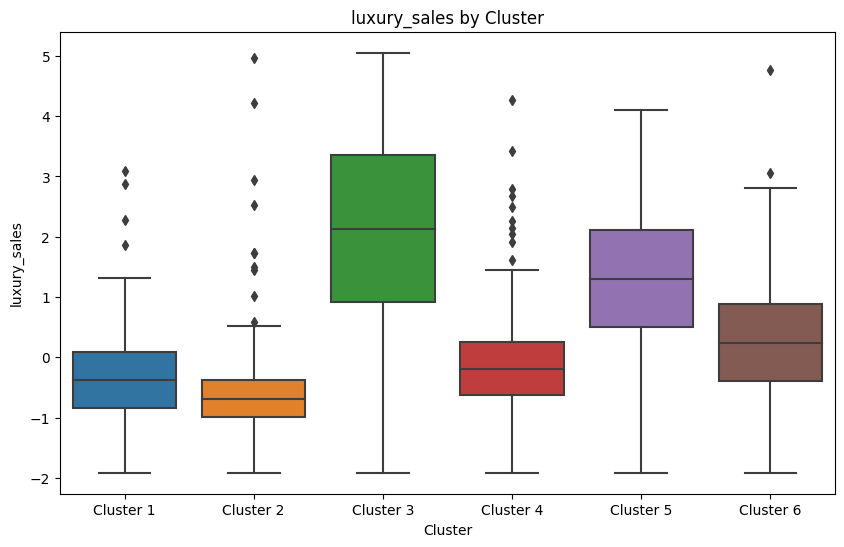

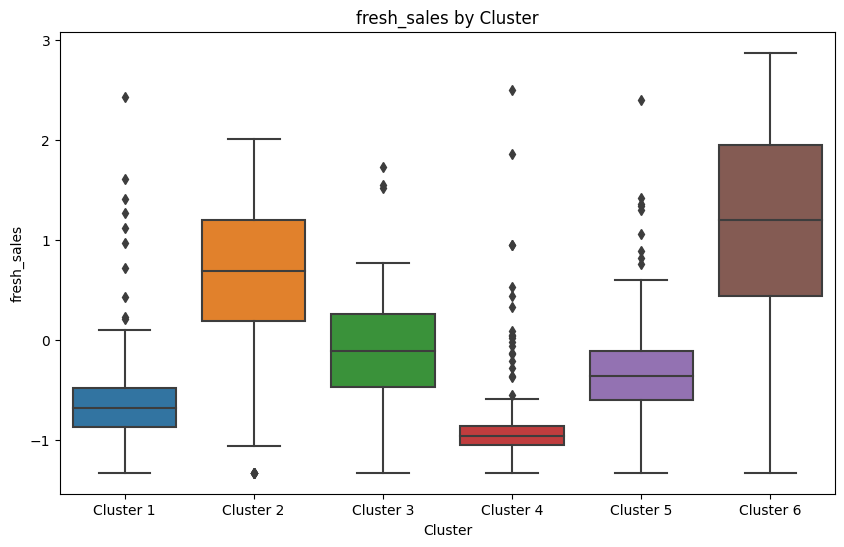

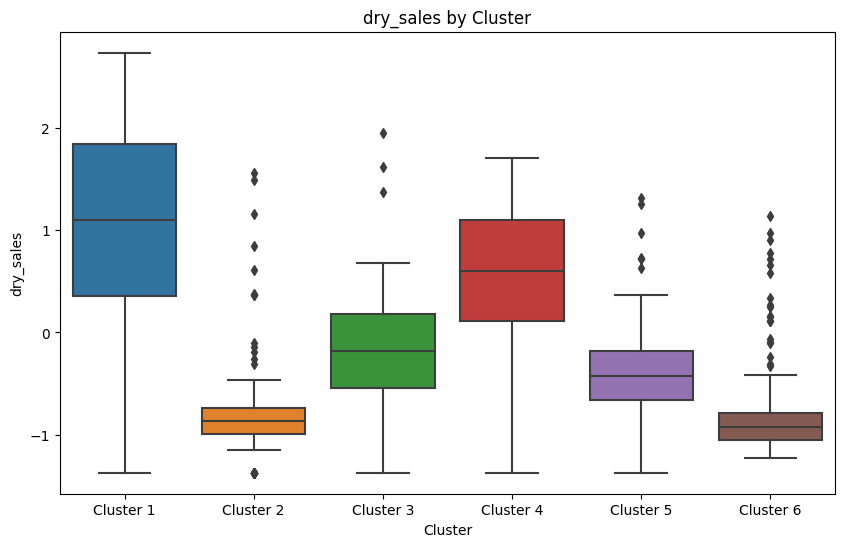

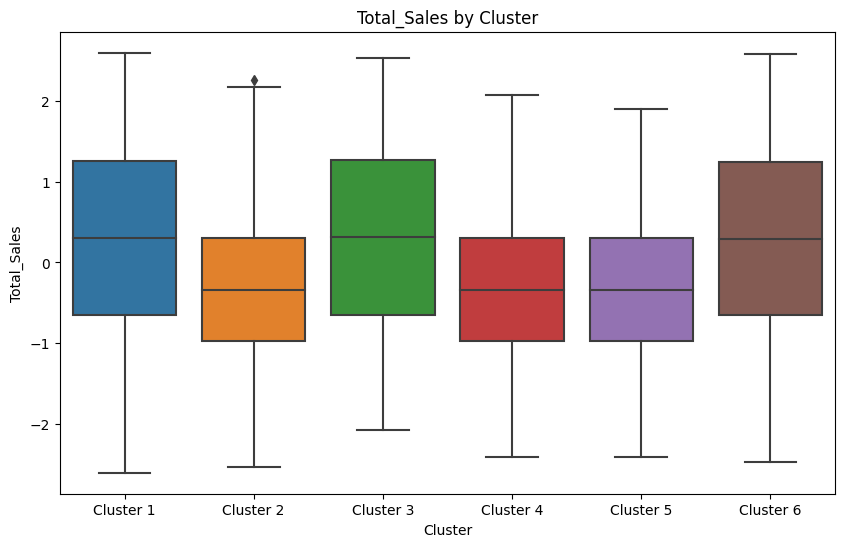

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

cluster_names = {1: "Cluster 1", 2: "Cluster 2", 3: "Cluster 3", 4: "Cluster 4", 5: "Cluster 5", 6: "Cluster 6"}

# Create a box plot for each feature
for feature in features[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales']]:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='cluster_catgeory', y=feature, data=df)
    plt.title(f"{feature} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(feature)
    plt.xticks(ticks=range(len(cluster_names)), labels=[cluster_names[i] for i in range(1, len(cluster_names) + 1)])
    plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

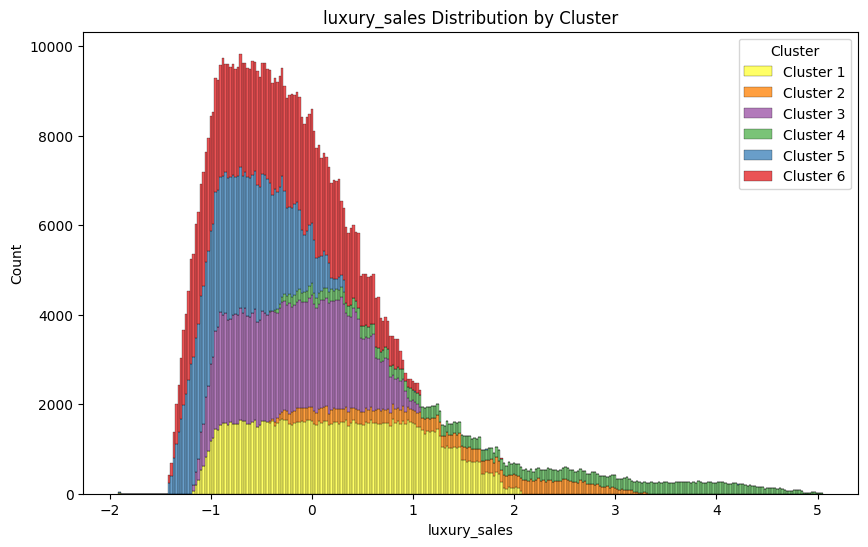

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

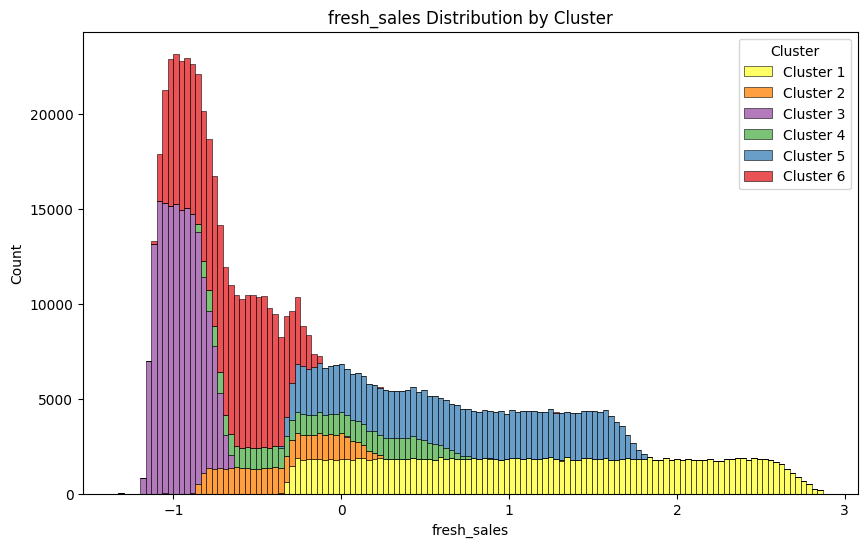

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

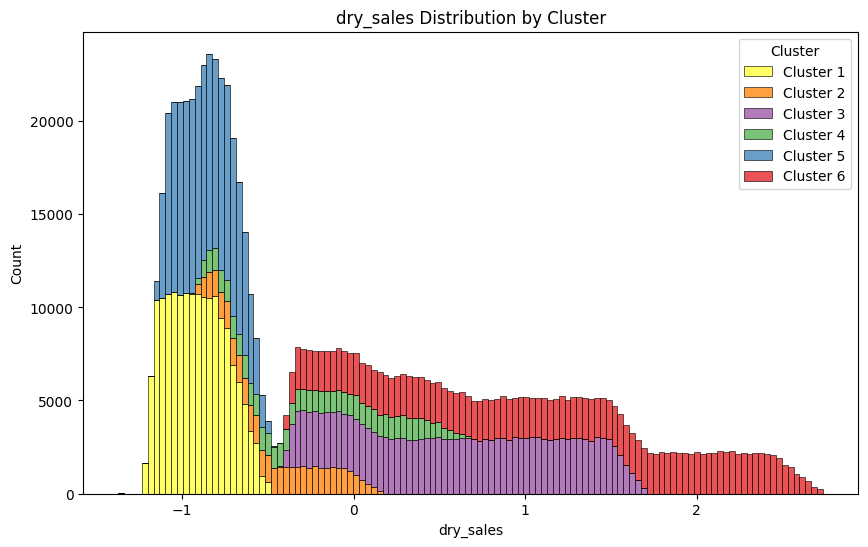

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

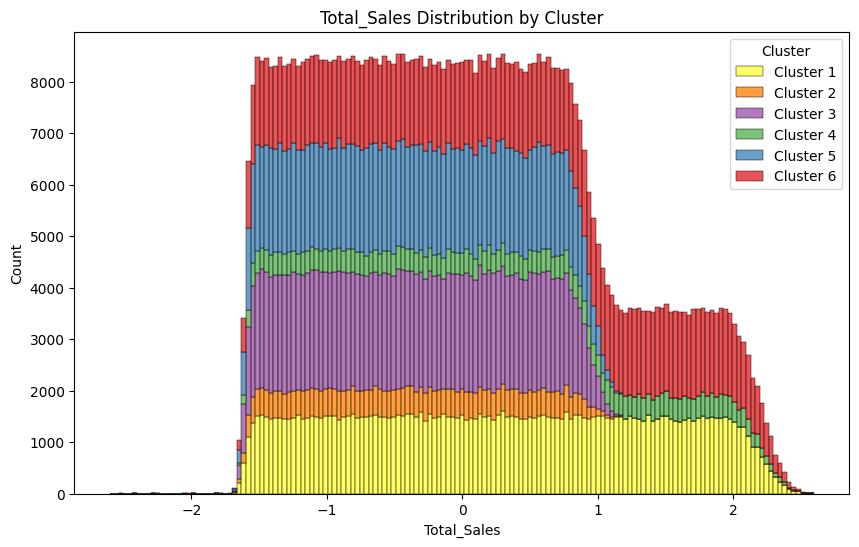

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

df.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Create a histogram for each feature
for feature in features[['luxury_sales', 'fresh_sales', 'dry_sales', 'Total_Sales']]:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='cluster_catgeory', multiple='stack', palette='Set1')
    plt.title(f"{feature} Distribution by Cluster")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Cluster', labels=[cluster_names[i] for i in range(1, len(cluster_names) + 1)])
    plt.show()
